# Introduction to Statistics in Python

### Libraries and datasets

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

food_consumption = pd.read_csv('datasets/food_consumption.csv', index_col=1)

## 1. Summary Statistics

### Mean and median
Instructions:
<ul>
<li>Import numpy with the alias np.</li>
<li>Create two DataFrames: one that holds the rows of food_consumption for 'Belgium' and another that holds rows for 'USA'. Call these be_consumption and usa_consumption.</li>
<li>Calculate the mean and median of kilograms of food consumed per person per year for both countries.</li>
<li>Subset food_consumption for rows with data about Belgium and the USA.</li>
<li>Group the subsetted data by country and select only the consumption column.</li>
<li>Calculate the mean and median of the kilograms of food consumed per person per year in each country using .agg().</li>
</ul>

In [9]:
# Import numpy with alias np
import numpy as np

# Filter for Belgium
be_consumption = food_consumption.query('country == "Belgium"')

# Filter for USA
usa_consumption = food_consumption.query('country == "USA"')

# Calculate mean and median consumption in Belgium
print(be_consumption.mean())
print(be_consumption.median())

# Calculate mean and median consumption in USA
print(usa_consumption.mean())
print(usa_consumption.median())

# Subset for Belgium and USA only
be_and_usa = food_consumption[(food_consumption['country'] == "Belgium") | (food_consumption['country'] == "USA")]

# Group by country, select consumption column, and compute mean and median
print(be_and_usa.groupby('country')['consumption'].agg(['mean','median']))

Unnamed: 0      402.000000
consumption      42.132727
co2_emission    100.190000
dtype: float64
Unnamed: 0      402.00
consumption      12.59
co2_emission     21.34
dtype: float64
Unnamed: 0       61.00
consumption      44.65
co2_emission    156.26
dtype: float64
Unnamed: 0      61.00
consumption     14.58
co2_emission    15.34
dtype: float64
              mean  median
country                   
Belgium  42.132727   12.59
USA      44.650000   14.58


C:\Users\pedro\AppData\Local\Temp\ipykernel_17976\2198508770.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print(be_consumption.mean())
C:\Users\pedro\AppData\Local\Temp\ipykernel_17976\2198508770.py:12: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print(be_consumption.median())
C:\Users\pedro\AppData\Local\Temp\ipykernel_17976\2198508770.py:15: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print(usa_consumption.mean())
C:\Users\pedro\AppData\Local\Temp\ipykernel_17976\21985087

### Mean vs. median
Instructions:
<ul>
<li>Import matplotlib.pyplot with the alias plt.</li>
<li>Subset food_consumption to get the rows where food_category is 'rice'.</li>
<li>Create a histogram of co2_emission for rice and show the plot.</li>
<li>Use .agg() to calculate the mean and median of co2_emission for rice.</li>
</ul>

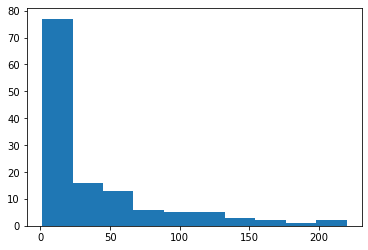

        Unnamed: 0  consumption  co2_emission
mean         718.5    29.375154     37.591615
median       718.5    11.875000     15.200000


C:\Users\pedro\AppData\Local\Temp\ipykernel_17976\2439675888.py:15: FutureWarning: ['country', 'food_category'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  print(rice_consumption.agg(['mean','median']))


In [15]:
# Import matplotlib.pyplot with alias plt
import matplotlib.pyplot as plt

# Subset for food_category equals rice
rice_consumption = food_consumption.query('food_category == "rice"')

# Histogram of co2_emission for rice and show plot
plt.hist(rice_consumption['co2_emission'])
plt.show()

# Subset for food_category equals rice
rice_consumption = food_consumption[food_consumption['food_category'] == 'rice']

# Calculate mean and median of co2_emission with .agg()
print(rice_consumption.agg(['mean','median']))

### Quartiles, quantiles, and quintiles
Instructions:
<ul>
<li>Calculate the quartiles of the co2_emission column of food_consumption.</li>
<li>Calculate the six quantiles that split up the data into 5 pieces (quintiles) of the co2_emission column of food_consumption.</li>
<li>Calculate the eleven quantiles of co2_emission that split up the data into ten pieces (deciles).</li>
</ul>

In [2]:
# Calculate the quartiles of co2_emission
print(np.quantile(food_consumption['co2_emission'], [0, 0.25, 0.5, 0.75, 1]))

# Calculate the quintiles of co2_emission
print(np.quantile(food_consumption['co2_emission'], np.linspace(0, 1, 6)))

# Calculate the deciles of co2_emission
print(np.quantile(food_consumption['co2_emission'], np.linspace(0,1,11)))

[   0.        5.21     16.53     62.5975 1712.    ]
[   0.       3.54    11.026   25.59    99.978 1712.   ]
[0.00000e+00 6.68000e-01 3.54000e+00 7.04000e+00 1.10260e+01 1.65300e+01
 2.55900e+01 4.42710e+01 9.99780e+01 2.03629e+02 1.71200e+03]


### Variance and standard deviation
Instructions:
<ul>
<li>Calculate the variance and standard deviation of co2_emission for each food_category by grouping and aggregating.</li>
<li>Import matplotlib.pyplot with alias plt.</li>
<li>Create a histogram of co2_emission for the beef food_category and show the plot.</li>
<li>Create a histogram of co2_emission for the eggs food_category and show the plot.</li>
</ul>

                        var         std
food_category                          
beef           88748.408132  297.906710
dairy          17671.891985  132.935669
eggs              21.371819    4.622966
fish             921.637349   30.358481
lamb_goat      16475.518363  128.356996
nuts              35.639652    5.969895
pork            3094.963537   55.632396
poultry          245.026801   15.653332
rice            2281.376243   47.763754
soybeans           0.879882    0.938020
wheat             71.023937    8.427570


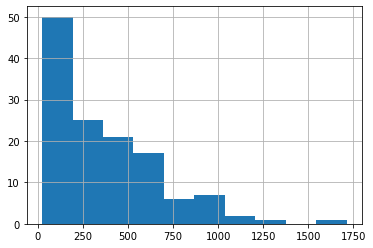

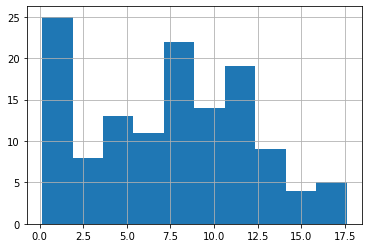

In [7]:
# Print variance and sd of co2_emission for each food_category
print(food_consumption.groupby('food_category')['co2_emission'].agg([np.var, np.std]))

# Import matplotlib.pyplot with alias plt
import matplotlib.pyplot as plt

# Create histogram of co2_emission for food_category 'beef'
food_consumption[food_consumption['food_category'] == 'beef']['co2_emission'].hist()
# Show plot
plt.show()

# Create histogram of co2_emission for food_category 'eggs'
food_consumption[food_consumption['food_category'] == 'eggs']['co2_emission'].hist()
# Show plot
plt.show()

### Finding outliers using IQR
Instructions:
<ul>
<li>Calculate the total co2_emission per country by grouping by country and taking the sum of co2_emission. Store the resulting DataFrame as emissions_by_country.</li>
<li>Compute the first and third quartiles of emissions_by_country and store these as q1 and q3.</li>
<li>Calculate the interquartile range of emissions_by_country and store it as iqr.</li>
<li>Calculate the lower and upper cutoffs for outliers of emissions_by_country, and store these as lower and upper.</li>
<li>Subset emissions_by_country to get countries with a total emission greater than the upper cutoff or a total emission less than the lower cutoff.</li>
</ul>

In [8]:
# Calculate total co2_emission per country: emissions_by_country
emissions_by_country = food_consumption.groupby('country')['co2_emission'].sum()

# Compute the first and third quantiles and IQR of emissions_by_country
q1 = np.quantile(emissions_by_country, 0.25)
q3 = np.quantile(emissions_by_country, 0.75)
iqr = q3 - q1

# Calculate the lower and upper cutoffs for outliers
lower = q1 - 1.5 * iqr
upper = q3 + 1.5 * iqr

# Subset emissions_by_country to find outliers
outliers = emissions_by_country[(emissions_by_country < lower) | (emissions_by_country > upper)]
print(outliers)

country
Argentina    2172.4
Name: co2_emission, dtype: float64


## 2. Random Numbers and Probability

## 3. More Distributions and the Central Limit Theorem

## 4. Correlation and Experimental Design